# Рубежный контроль №1
_________________________________________________
Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.
_______________________________________________________________
## Тема: Методы обработки данных.
________________________________________________________________
Для студентов группы ИУ5-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

### Задача №1.
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных с использованием библиотек Matplotlib и Seaborn. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков? Проведите корреляционный анализ. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Наборы данных:https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [ ]:
#Start ML proj
import pandas as pd
pd.set_option('display.max.columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

In [2]:
df = pd.read_csv('data/houses_to_rent_v1.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"


#### Посмотрим кол-во пропущенных значений и основные характеристики

In [4]:
df.isna().sum().sum()

0

In [5]:
df.describe()

,city,area,rooms,bathroom,parking spaces
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250
std,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,2.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000


In [6]:
df.describe(include='object')

,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,6080,6080,6080,6080,6080,6080,6080,6080
unique,37,2,2,1292,1032,1036,190,4069
top,-,acept,not furnished,R$0,"R$15,000",R$0,R$23,"R$2,555"
freq,1555,4666,4498,1291,155,1053,163,35


In [7]:
df.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

###### Преобразуем доллары в numeric тип

In [8]:
def money_to_num(x):
    x = x[2:]
    try:
        return float(x.replace(',','.'))
    except ValueError:
        return ''

In [9]:
df["hoa"] = pd.to_numeric(df["hoa"].apply(money_to_num))
df["rent amount"] = pd.to_numeric(df["rent amount"].apply(money_to_num))
df["property tax"] = pd.to_numeric(df["property tax"].apply(money_to_num))
df["fire insurance"] = pd.to_numeric(df["fire insurance"].apply(money_to_num))
df["total"] = pd.to_numeric(df["total"].apply(money_to_num))

In [10]:
df.isna().sum()

city                0
area                0
rooms               0
bathroom            0
parking spaces      0
floor               0
animal              0
furniture           0
hoa               202
rent amount         0
property tax       27
fire insurance      0
total               0
dtype: int64

Заполним пропуски нулями

In [11]:
df.fillna(0, inplace=True)

In [12]:
df.isna().sum().sum()

0

In [13]:
df.describe(include='object')

,floor,animal,furniture
count,6080,6080,6080
unique,37,2,2
top,-,acept,not furnished
freq,1555,4666,4498


Посмотрим на описательные статистики

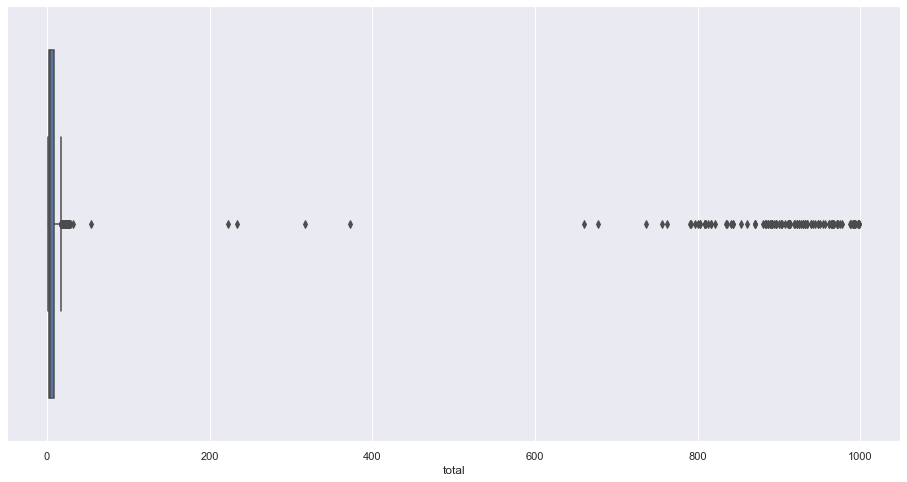

In [14]:
sns.boxplot(df["total"])

In [17]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [20]:
import plotly.express as px
col = ['city', 'area', 'rooms', 'bathroom', 'rent amount', 'total']
fig = px.scatter_matrix(df[col])
fig.show()

In [21]:
col = ['parking spaces', 'floor', 'animal', 'furniture', 'hoa', 'property tax',
       'fire insurance', 'total']
fig = px.scatter_matrix(df[col])
fig.show()

Уберем записи с аномальными значениями (отсечем значения меньше и больше 1 и 3 квантиля с некоторым отступом)

In [30]:
q1 = df["total"].quantile(0.25)
q3 = df["total"].quantile(0.75)

IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [31]:
df_m = df[~((df["total"] < IF) | (df["total"] > OF))]
df_m.shape

(5775, 13)

In [40]:
df_anomaly = df[(df["total"] > OF)]

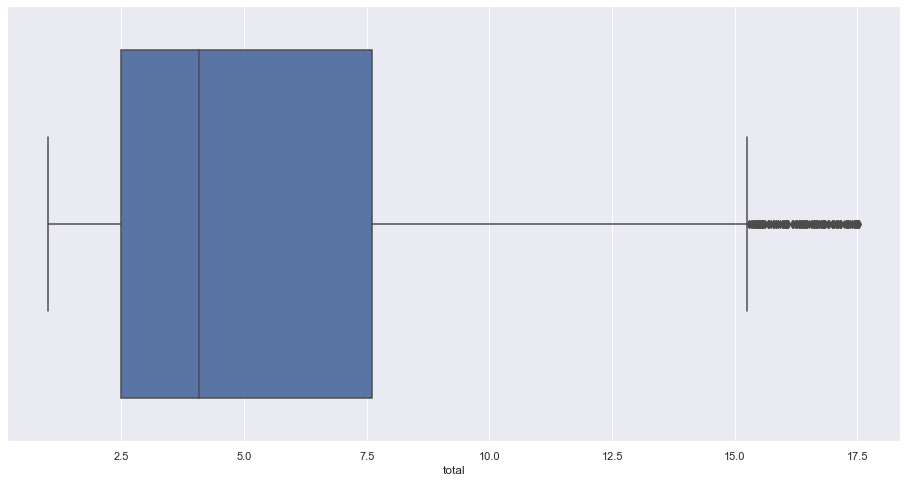

In [33]:
sns.boxplot(df_m["total"])

###### Построим корреляционную матрицу

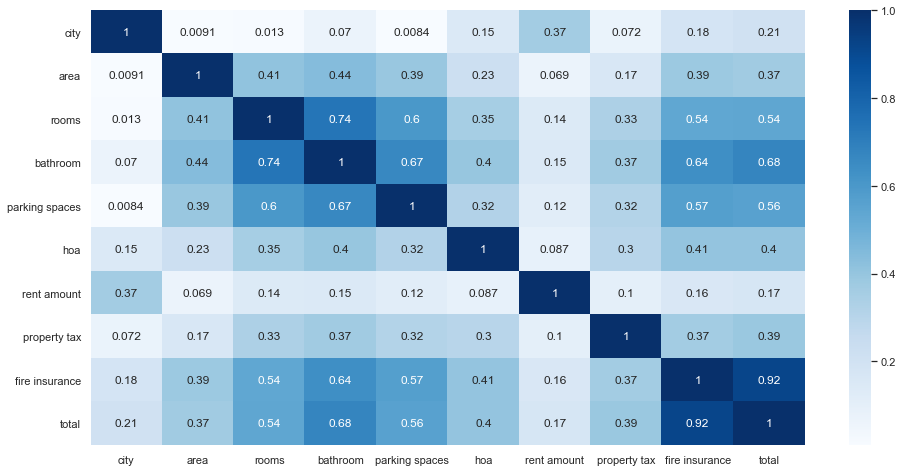

In [38]:
ax = sns.heatmap(abs(df_m.corr()), annot=True,cmap="Blues")

In [58]:
#ax = sns.heatmap(abs(df.corr()), annot=True,cmap="Blues")
#ax = sns.heatmap(abs(df_anomaly.corr()), annot=True,cmap="Blues")

Из корреляционной матрицы видно, что:
- поле 'fire insurance' имеет очень высокую корреляцию с ценой 'total'
- 'rooms', 'bathroom', 'parking spaces' высокую
- 'property tax' среднюю
- 'rent amount', 'city' слабую

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


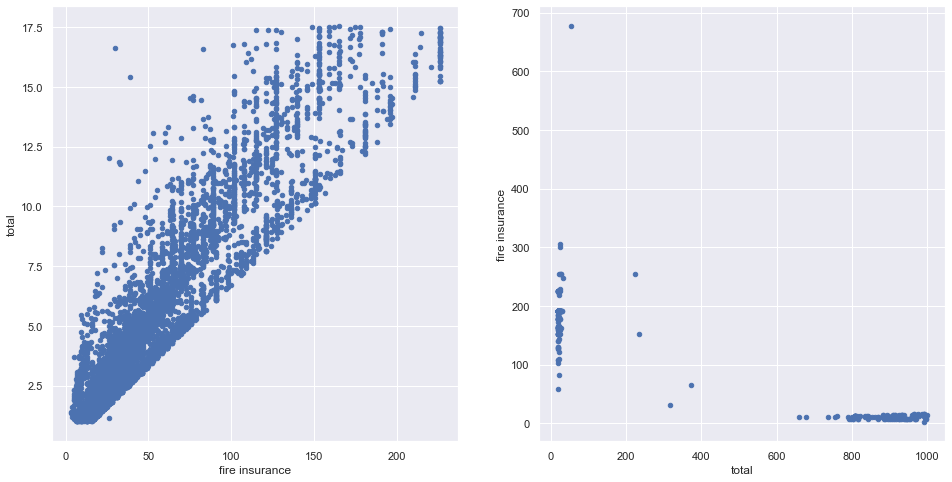

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_m.plot(x='fire insurance', y='total', kind='scatter', ax=axes[0]);
df_anomaly.plot(x='total', y='fire insurance', kind='scatter', ax=axes[1]);


In [61]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [82]:
cols = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance']

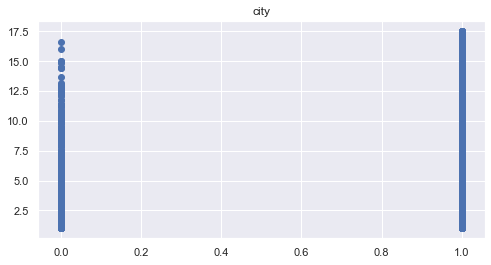

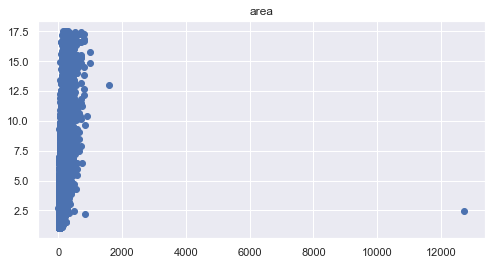

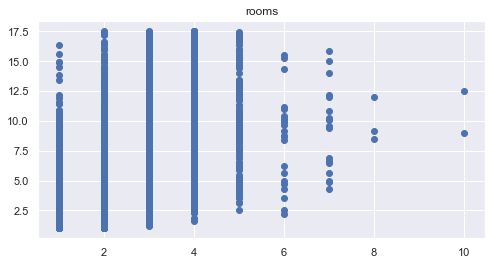

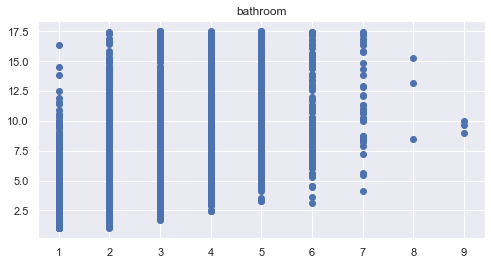

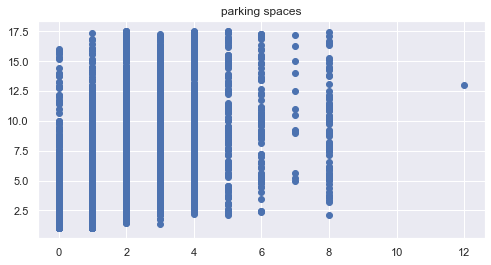

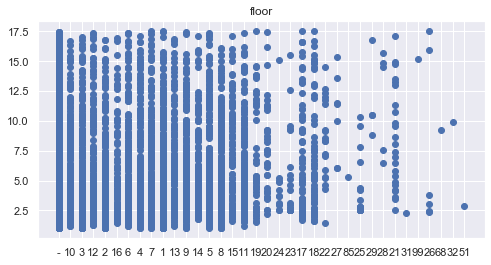

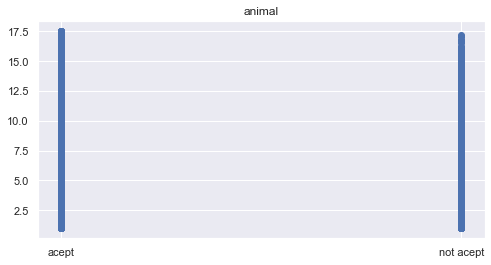

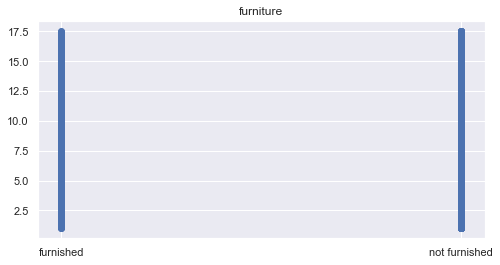

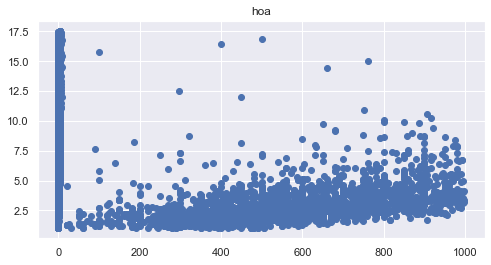

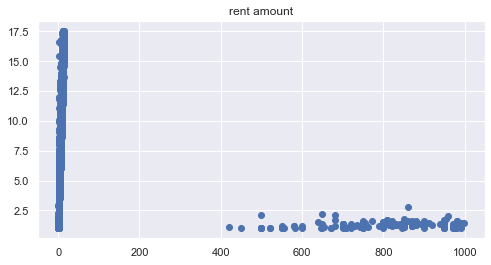

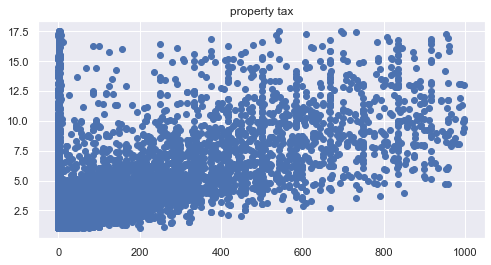

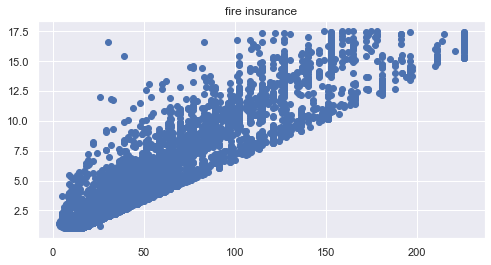

In [85]:
for col in cols:
    plt.figure(figsize=(8, 4))
    plt.scatter(y=df_m.total, x=df_m[col])
    plt.title(col)

### Задача №2.
Для заданного набора данных проведите обработку пропусков в данных. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему? Для заданного набора данных произведите масштабирование данных и преобразование категориальных признаков в количественные. Какие методы Вы использовали для решения задачи и почему?

Наборы данных:https://www.kaggle.com/arindam235/startup-investments-crunchbase